In [981]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.datasets import make_moons

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set(rc={'figure.figsize':(6, 4)})
sns.set_style('white')
sns.despine()

<Figure size 600x400 with 0 Axes>

In [982]:
def generate1():  
    while True:  
        x = np.random.uniform(1, 3)  
        y = np.random.uniform(1, 3)  
        if (x - 1) ** 2 + (y - 3) ** 2 > 2:  
            continue  
        return x, y
def generate2():  
    while True:  
        x = np.random.uniform(2, 4)  
        y = np.random.uniform(4, 7)  
        if (x - 4) ** 2 + (y - 5) ** 2 > 2:  
            continue  
        return x, y

In [983]:
n = 200
feature = []
target = []

In [984]:
for i in range(n):
    x, y = generate1()
    feature.append([1, x, y])
    target.append(1)

    x, y = generate2()
    feature.append([-1, x, y])
    target.append(-1)

In [985]:
n = 200

In [986]:
X, y228 = make_moons(n_samples=n, random_state=42, noise=0.1)

In [987]:
z1 = X

In [988]:
temp = np.array([np.ones(n, dtype='float')])

In [989]:
temp = temp

In [990]:
temp.shape

(1, 200)

In [991]:
X = X.transpose()

In [992]:
X = np.concatenate((temp, X))

In [993]:
X = X.transpose()

In [994]:
y

4.605929159781529

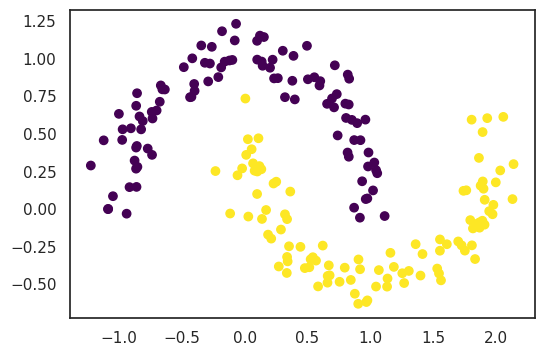

In [995]:
plt.scatter(z1[:, 0], z1[:, 1], c=y228, cmap="viridis")
plt.show()

In [996]:
for i in range(len(y228)):
    if y228[i] == 0:
        y228[i] = -1

In [997]:
class LogisticRegression():
    def __init__(self, iterations=100, learning_rate=0.1, verbose=50, silence='False'):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.silence = silence

        self.init_weights()

    def init_weights(self):
        self.w = np.ones(3)# хз как сайз features узнать тут

    def computeGradient(self, X, y):
        grad = [0] * len(self.w)
        exponenta = np.exp(-y * (self.w[0] + self.w[1] * X[1] + self.w[2] * X[2]))
        grad[0] = - exponenta * y * X[0] / (1 + exponenta)
        grad[1] = - exponenta * y * X[1] / (1 + exponenta)
        grad[2] = - exponenta * y * X[2] / (1 + exponenta)
        
        return grad
    
    def sigmoid(self, x):                                        
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        for i in range(self.iterations):
            for j in range(len(X)):
                grad = self.computeGradient(X[j], y[j])
                self.w[0] -= self.learning_rate * grad[0]
                self.w[1] -= self.learning_rate * grad[1]
                self.w[2] -= self.learning_rate * grad[2]

            # if i <= 10:
            #     for k in range(n):
            #         if target[i] == 1:
            #             plt.scatter(X[k][1], X[k][2], color='red')
            #         else:
            #             plt.scatter(X[k][1], X[k][2], color='black')

            #     x0 = np.random.uniform(6, 8)
            #     y0 = -(self.w[1] * x0 + self.w[0]) / self.w[2]

            #     x1 = np.random.uniform(-4, -2)
            #     y1 = -(self.w[1] * x1 + self.w[0]) / self.w[2]

            #     plt.plot([x0, x1], [y0, y1])
            #     plt.show()

        return self.w

    def predict(self, X):
        pred = []
        for i in range(len(X)):
            pred.append(self.sigmoid((self.w[0] + self.w[1] * X[i][1] + self.w[2] * X[i][2])))
        
        return pred


In [998]:
model = LogisticRegression(iterations=1500, learning_rate=0.1)
w = model.fit(X, y228)

X1, y1 = make_moons(n_samples=n, random_state=42, noise=0.1)

In [999]:
X1 = X1.transpose()
temp = np.array([np.ones(n, dtype='float')])
X1 = np.concatenate((temp, X1))
X1 = X1.transpose()

In [ ]:
X1

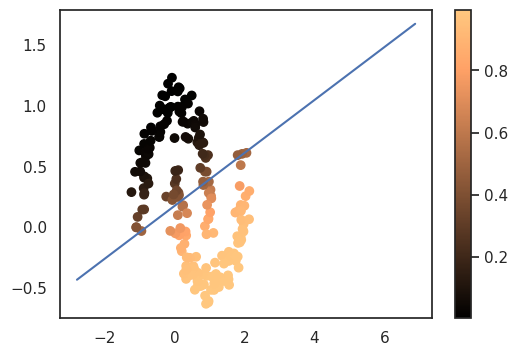

In [1001]:
weights = model.predict(X1)

plt.scatter(z1[:, 0], z1[:, 1], c=weights, cmap='copper')
plt.colorbar()

x0 = np.random.uniform(6, 8)
y0 = -(w[1] * x0 + w[0]) / w[2]

x1 = np.random.uniform(-4, -2)
y1 = -(w[1] * x1 + w[0]) / w[2]

plt.plot([x0, x1], [y0, y1])
# sns.set_ticks([0, .25, .5, .75, 1])
plt.show()
# for i in range(n):
#     if target[i] == 1:
#         plt.scatter(feature[i][1], feature[i][2], color='red')
#     else:
#         plt.scatter(feature[i][1], feature[i][2], color='black')

In [1014]:
x = np.random.uniform(-1.1, 2.5, size=10000)
y = np.random.uniform(-0.75, 1.25, size=10000)
temp = np.zeros(10000, dtype='float')

z = np.array([x, y])

data = np.array([temp, x, y])
data = data.transpose()

In [1015]:
pred = model.predict(data)

In [1016]:
pred = np.array(pred)

In [1017]:
data.shape

(10000, 3)

In [1018]:
z = z.transpose()

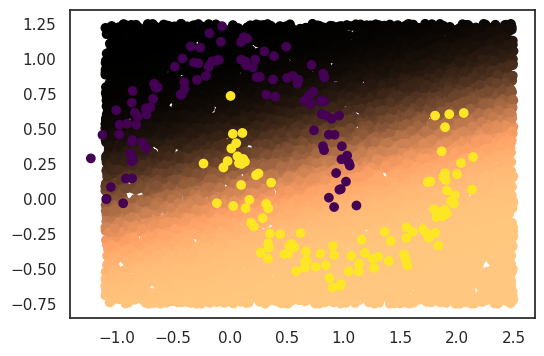

In [1019]:
plt.scatter(z[:, 0], z[:, 1], c=pred, cmap='copper')
plt.scatter(z1[:, 0], z1[:, 1], c=y228, cmap="viridis")